In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/InControl/Anomaly_data/1group_2017_01-2017_04.csv', index_col = 'timestamp', parse_dates=True, squeeze=True)
df

In [ ]:
!pip install adtk

/usr/local/lib/python3.10/dist-packages/adtk/data/_data.py:164: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t, v in time_window_end_series.iteritems():  # type: pd.Timestamp, int


[<Axes: >]

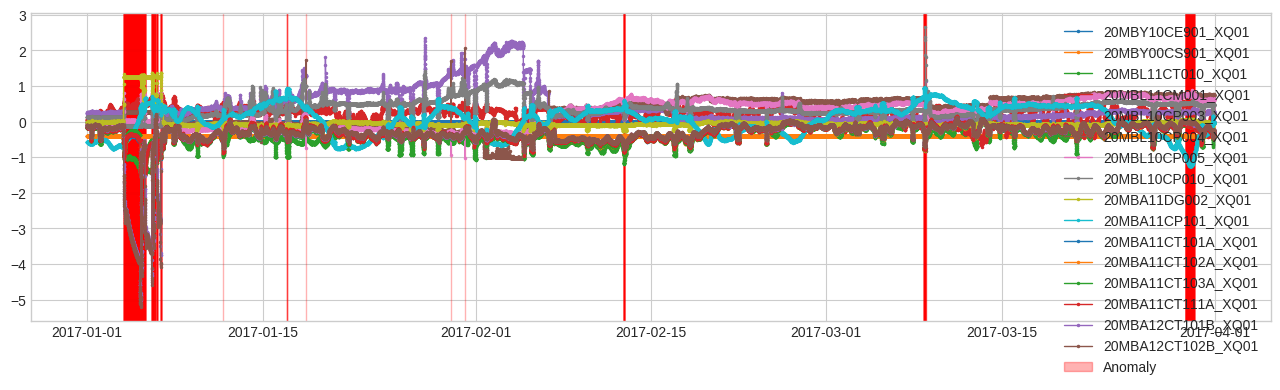

In [ ]:
from adtk.visualization import plot
from adtk.detector import PcaAD
pca_ad = PcaAD(k=2, c = 3)
anomalies = pca_ad.fit_detect(df)
plot(df, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_color='red', anomaly_alpha=0.3, curve_group='all')

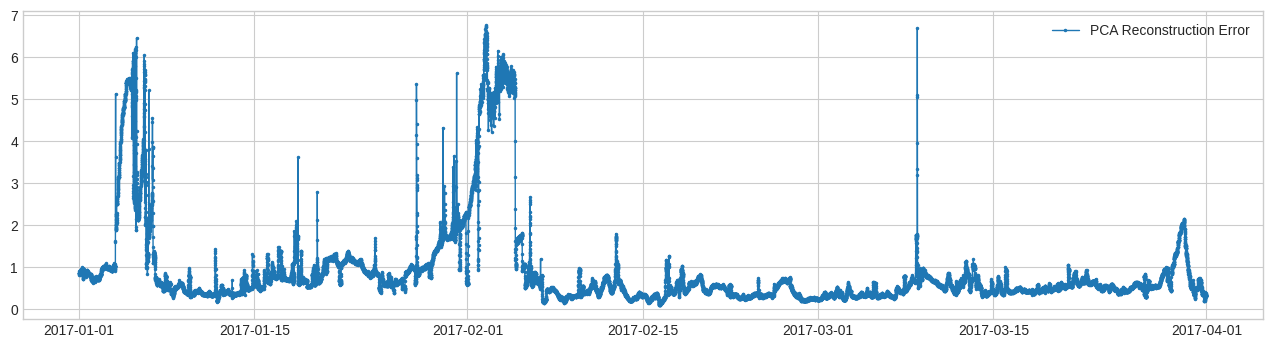

In [ ]:
from adtk.transformer import PcaReconstructionError
s = PcaReconstructionError(k=1).fit_transform(df).rename("PCA Reconstruction Error")
plot(s, ts_linewidth=1, ts_markersize=3, curve_group=["PCA Reconstruction Error"]);

[<Axes: >]

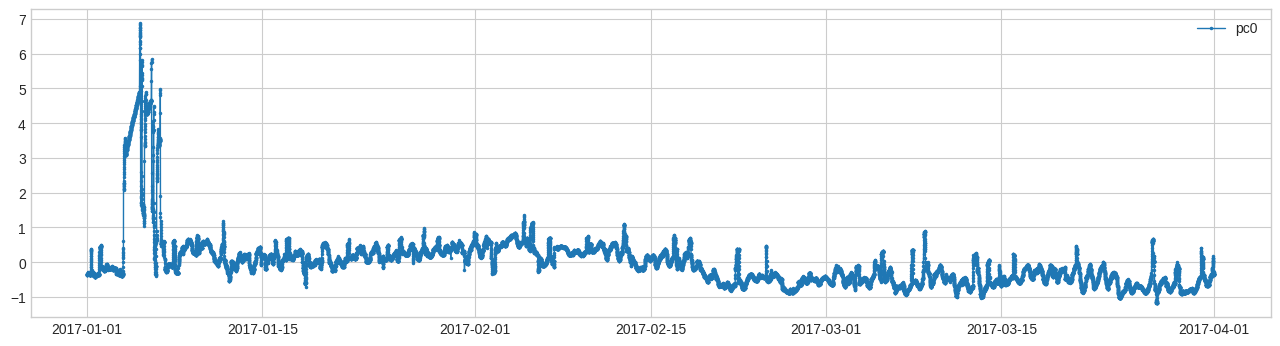

In [ ]:
from adtk.transformer import PcaProjection
s = PcaProjection(k=1).fit_transform(df)
plot(s, ts_linewidth=1, ts_markersize=3, curve_group=["pc0"])